# Getting fung data with uncertainties

Use the uncertainties to generate dummy data for fungicide distribution fitting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Initially with normal distribution

In [3]:
fdf = pd.read_csv('../data/01_raw/fungicide_frank_with_uncertainty.csv')

fdf.head(2)

,year,RD,RDU,k,kU,R2
0,2001,0.760,0.033,2.32,0.29,0.99
1,2002,0.891,0.015,10.29,1.71,0.99


In [4]:
np.random.seed(0)

In [5]:
def control(RD, k):
    out = 100*(RD - RD * np.exp(-k))
    return out

In [6]:
df = (
    pd.concat([fdf]*1000)
    .reset_index(drop=True)
    .sort_values('year')
    .assign(
        RDnoise = lambda df: np.random.normal(0, df.RDU),
        thisRD = lambda df: df.RD + df.RDnoise,
        knoise = lambda df: np.random.normal(0, df.kU),
        thisK = lambda df: df.k + df.knoise,
        control = lambda df: control(df.RD, df.k),
        control_with_noise = lambda df: control(df.thisRD, df.thisK),
        yearnoise = lambda df: df.year + np.random.normal(0, 0.1, len(df))
    )
)

df

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise
0,2001,0.760,0.033,2.32,0.29,0.99,0.058214,0.818214,0.001744,2.321744,68.531207,73.794505,2000.960789
12042,2001,0.760,0.033,2.32,0.29,0.99,0.013205,0.773205,0.218304,2.538304,68.531207,71.212175,2001.037995
2484,2001,0.760,0.033,2.32,0.29,0.99,0.032298,0.792298,0.067408,2.387408,68.531207,71.951187,2000.978314
12060,2001,0.760,0.033,2.32,0.29,0.99,0.073949,0.833949,0.171535,2.491535,68.531207,76.491281,2000.871846
12078,2001,0.760,0.033,2.32,0.29,0.99,0.061629,0.821629,-0.296132,2.023868,68.531207,71.305657,2000.944418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,2018,0.477,0.094,1.48,0.69,0.89,0.011194,0.488194,0.498659,1.978659,36.841682,42.069861,2018.179817
11249,2018,0.477,0.094,1.48,0.69,0.89,0.011086,0.488086,0.303457,1.783457,36.841682,40.605985,2017.957183
11231,2018,0.477,0.094,1.48,0.69,0.89,-0.001252,0.475748,-0.295996,1.184004,36.841682,33.014474,2018.036188
11447,2018,0.477,0.094,1.48,0.69,0.89,-0.013752,0.463248,0.894943,2.374943,36.841682,42.015673,2017.945926


In [7]:
dfgood = (
    df
    .loc[lambda x: (
        (x.control_with_noise>0) &
        (x.control_with_noise<100) &
        (x.thisRD>0) &
        (x.thisRD<1) &
        (x.thisK>0)
    )
    ]
)

dfgood

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise
0,2001,0.760,0.033,2.32,0.29,0.99,0.058214,0.818214,0.001744,2.321744,68.531207,73.794505,2000.960789
12042,2001,0.760,0.033,2.32,0.29,0.99,0.013205,0.773205,0.218304,2.538304,68.531207,71.212175,2001.037995
2484,2001,0.760,0.033,2.32,0.29,0.99,0.032298,0.792298,0.067408,2.387408,68.531207,71.951187,2000.978314
12060,2001,0.760,0.033,2.32,0.29,0.99,0.073949,0.833949,0.171535,2.491535,68.531207,76.491281,2000.871846
12078,2001,0.760,0.033,2.32,0.29,0.99,0.061629,0.821629,-0.296132,2.023868,68.531207,71.305657,2000.944418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,2018,0.477,0.094,1.48,0.69,0.89,0.011194,0.488194,0.498659,1.978659,36.841682,42.069861,2018.179817
11249,2018,0.477,0.094,1.48,0.69,0.89,0.011086,0.488086,0.303457,1.783457,36.841682,40.605985,2017.957183
11231,2018,0.477,0.094,1.48,0.69,0.89,-0.001252,0.475748,-0.295996,1.184004,36.841682,33.014474,2018.036188
11447,2018,0.477,0.094,1.48,0.69,0.89,-0.013752,0.463248,0.894943,2.374943,36.841682,42.015673,2017.945926


In [8]:
dfuse = (
    dfgood
    .groupby('year').head(100)
    .reset_index(drop=True)
)

dfuse

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise
0,2001,0.760,0.033,2.32,0.29,0.99,0.058214,0.818214,0.001744,2.321744,68.531207,73.794505,2000.960789
1,2001,0.760,0.033,2.32,0.29,0.99,0.013205,0.773205,0.218304,2.538304,68.531207,71.212175,2001.037995
2,2001,0.760,0.033,2.32,0.29,0.99,0.032298,0.792298,0.067408,2.387408,68.531207,71.951187,2000.978314
3,2001,0.760,0.033,2.32,0.29,0.99,0.073949,0.833949,0.171535,2.491535,68.531207,76.491281,2000.871846
4,2001,0.760,0.033,2.32,0.29,0.99,0.061629,0.821629,-0.296132,2.023868,68.531207,71.305657,2000.944418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2018,0.477,0.094,1.48,0.69,0.89,-0.011217,0.465783,0.463160,1.943160,36.841682,39.905896,2017.895159
1796,2018,0.477,0.094,1.48,0.69,0.89,0.073096,0.550096,-0.528060,0.951940,36.841682,33.776357,2017.983769
1797,2018,0.477,0.094,1.48,0.69,0.89,0.041583,0.518583,1.033101,2.513101,36.841682,47.656878,2017.806262
1798,2018,0.477,0.094,1.48,0.69,0.89,0.129173,0.606173,-0.671733,0.808267,36.841682,33.604432,2018.056032


In [9]:
dfbad = (
    df
    .loc[lambda x: (
        (x.control_with_noise<=0) |
        (x.control_with_noise>=100) |
        (x.thisRD<=0) |
        (x.thisRD>=1) |
        (x.thisK<=0)
    )
    ]
    .astype({'year': 'int64'})
)

print(len(dfbad))

783


In [10]:
dfbad.year.unique()

array([2011, 2013, 2015, 2017, 2018], dtype=int64)

In [11]:
from matplotlib.ticker import MaxNLocator

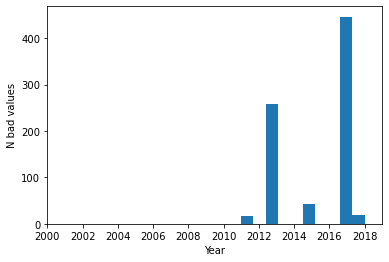

In [12]:
f, ax = plt.subplots()

dfbad.year.hist(ax=ax)

ax.grid(False)

ax.set_xlim([2000, 2019])

ax.set_ylabel('N bad values')

ax.set_xlabel('Year')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [13]:
# f.savefig('../figures/paper_figs/bad_years.jpg')

In [14]:
dfbad.describe()

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,2015.466156,0.894826,0.227888,0.704891,0.263972,0.972567,0.221244,1.116071,-0.087653,0.617239,43.935166,48.040282,2015.471283
std,1.987446,0.093070,0.113145,0.213371,0.105328,0.018413,0.203742,0.228161,0.446961,0.399862,7.951986,28.786542,1.995568
min,2011.000000,0.477000,0.087000,0.540000,0.150000,0.890000,-1.061854,-0.151854,-2.131506,-0.910379,36.841682,-97.530746,2010.923291
25%,2013.000000,0.910000,0.087000,0.540000,0.150000,0.970000,0.099312,1.029105,-0.186767,0.416245,37.969909,40.029512,2013.045641
50%,2017.000000,0.910000,0.325000,0.540000,0.290000,0.970000,0.172832,1.086447,-0.015027,0.696694,37.969909,56.016989,2016.914168
75%,2017.000000,0.948000,0.325000,0.870000,0.290000,0.990000,0.329268,1.213901,0.150362,0.887823,55.083393,65.431563,2017.034026
max,2018.000000,0.948000,0.325000,1.480000,0.690000,0.990000,1.169451,2.079451,0.976449,2.043612,55.083393,111.212786,2018.165628


In [15]:
dfuse

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise
0,2001,0.760,0.033,2.32,0.29,0.99,0.058214,0.818214,0.001744,2.321744,68.531207,73.794505,2000.960789
1,2001,0.760,0.033,2.32,0.29,0.99,0.013205,0.773205,0.218304,2.538304,68.531207,71.212175,2001.037995
2,2001,0.760,0.033,2.32,0.29,0.99,0.032298,0.792298,0.067408,2.387408,68.531207,71.951187,2000.978314
3,2001,0.760,0.033,2.32,0.29,0.99,0.073949,0.833949,0.171535,2.491535,68.531207,76.491281,2000.871846
4,2001,0.760,0.033,2.32,0.29,0.99,0.061629,0.821629,-0.296132,2.023868,68.531207,71.305657,2000.944418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2018,0.477,0.094,1.48,0.69,0.89,-0.011217,0.465783,0.463160,1.943160,36.841682,39.905896,2017.895159
1796,2018,0.477,0.094,1.48,0.69,0.89,0.073096,0.550096,-0.528060,0.951940,36.841682,33.776357,2017.983769
1797,2018,0.477,0.094,1.48,0.69,0.89,0.041583,0.518583,1.033101,2.513101,36.841682,47.656878,2017.806262
1798,2018,0.477,0.094,1.48,0.69,0.89,0.129173,0.606173,-0.671733,0.808267,36.841682,33.604432,2018.056032


In [16]:
df

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise
0,2001,0.760,0.033,2.32,0.29,0.99,0.058214,0.818214,0.001744,2.321744,68.531207,73.794505,2000.960789
12042,2001,0.760,0.033,2.32,0.29,0.99,0.013205,0.773205,0.218304,2.538304,68.531207,71.212175,2001.037995
2484,2001,0.760,0.033,2.32,0.29,0.99,0.032298,0.792298,0.067408,2.387408,68.531207,71.951187,2000.978314
12060,2001,0.760,0.033,2.32,0.29,0.99,0.073949,0.833949,0.171535,2.491535,68.531207,76.491281,2000.871846
12078,2001,0.760,0.033,2.32,0.29,0.99,0.061629,0.821629,-0.296132,2.023868,68.531207,71.305657,2000.944418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,2018,0.477,0.094,1.48,0.69,0.89,0.011194,0.488194,0.498659,1.978659,36.841682,42.069861,2018.179817
11249,2018,0.477,0.094,1.48,0.69,0.89,0.011086,0.488086,0.303457,1.783457,36.841682,40.605985,2017.957183
11231,2018,0.477,0.094,1.48,0.69,0.89,-0.001252,0.475748,-0.295996,1.184004,36.841682,33.014474,2018.036188
11447,2018,0.477,0.094,1.48,0.69,0.89,-0.013752,0.463248,0.894943,2.374943,36.841682,42.015673,2017.945926


# t distribution

In [17]:
from scipy.stats import t

In [18]:
df_t = (
    df
    .assign(
        knoiset = lambda x: t.rvs(df=3, loc=0, scale=x.kU),
        RDnoiset = lambda x: t.rvs(df=3, loc=0, scale=x.RDU),
        thisRDt = lambda x: x.RD + x.RDnoiset,
        thisKt = lambda x: x.k + x.knoiset,
        control_with_noise_t = lambda x: control(x.thisRDt, x.thisKt)
    )
)

Text(0, 0.5, 't')

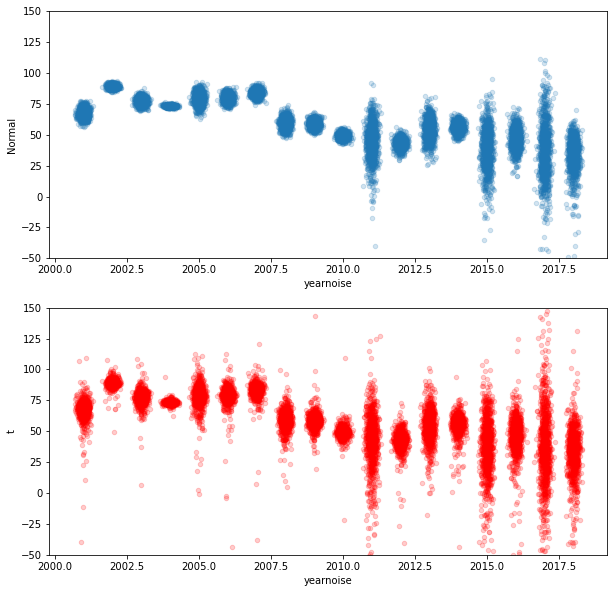

In [19]:
f, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,10)
)

df_t.plot.scatter(x='yearnoise', y='control_with_noise', ax=ax[0], alpha=0.2)
df_t.plot.scatter(x='yearnoise', y='control_with_noise_t', ax=ax[1], c='r', alpha=0.2)

ax[0].set_ylim([-50,150])
ax[1].set_ylim([-50,150])

ax[0].set_ylabel('Normal')
ax[1].set_ylabel('t')

In [20]:
# f.savefig('../figures/paper_figs/normal_vs_t.jpg')

In [21]:
df_t_bad = (
    df_t
    .loc[lambda df: (
        (df.control_with_noise_t<=0) |
        (df.control_with_noise_t>=100) # |
        # (df.thisKt<=0) |
        # (df.thisRDt>=1) |
        # (df.thisRDt<=0)
    )]
)

df_t_bad.describe()

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise,knoiset,RDnoiset,thisRDt,thisKt,control_with_noise_t
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,4.010000e+02
mean,2014.381546,0.747621,0.180115,1.312095,0.423541,0.953591,0.013112,0.760733,-0.022209,1.289886,44.939561,43.584299,2014.377676,-1.242536,-0.027664,0.719957,0.069559,-1.597964e+06
std,4.097750,0.152469,0.110366,1.489061,0.205774,0.030026,0.210476,0.268975,0.517425,1.464079,12.530146,21.791702,4.105004,2.183914,0.644766,0.666294,1.987170,3.169758e+07
min,2001.000000,0.477000,0.015000,0.540000,0.150000,0.890000,-0.628749,0.254352,-3.805586,-0.440907,36.841682,-53.069153,2000.838988,-26.076513,-3.153185,-2.463185,-15.786513,-6.347362e+08
25%,2011.000000,0.684000,0.094000,0.540000,0.290000,0.940000,-0.084055,0.577810,-0.246024,0.577669,37.969909,30.612680,2011.209580,-1.720643,-0.190431,0.468629,-0.550199,-4.925322e+01
50%,2016.000000,0.690000,0.165000,0.910000,0.420000,0.970000,0.006038,0.739705,0.043308,0.924240,40.867343,43.962334,2016.043017,-1.082614,-0.004400,0.687092,-0.172163,-1.665297e+01
75%,2017.000000,0.910000,0.325000,1.480000,0.440000,0.970000,0.107295,0.889451,0.273743,1.512311,46.932487,55.277674,2017.036598,-0.095413,0.191941,1.014521,0.572752,-2.359834e+00
max,2018.000000,0.948000,0.325000,12.360000,1.710000,0.990000,1.169451,2.079451,1.698424,14.058424,89.096973,107.721104,2018.240638,1.690309,3.372965,4.282965,12.914876,2.374254e+02


<AxesSubplot:xlabel='year'>

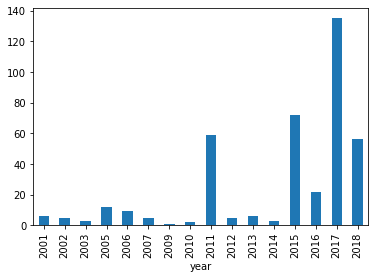

In [22]:
df_t_bad.groupby('year').count().control_with_noise_t.plot.bar()

In [23]:
df_t_good = (
    df_t
    .loc[lambda df: (
        (df.control_with_noise_t>=0) &
        (df.control_with_noise_t<=100) # &
        # (df.thisKt>=0) &
        # (df.thisRDt<=1) &
        # (df.thisRDt>=0)
    )]
)

<AxesSubplot:xlabel='year'>

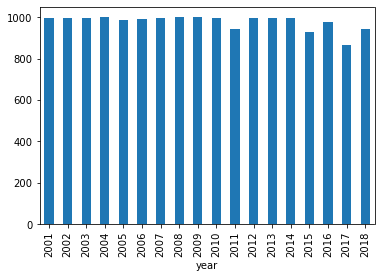

In [24]:
df_t_good.groupby('year').count().control_with_noise_t.plot.bar()

In [25]:
df_t_out = (
    df_t_good
    .groupby('year').head(500)
    .reset_index(drop=True)
)

df_t_out

,year,RD,RDU,k,kU,R2,RDnoise,thisRD,knoise,thisK,control,control_with_noise,yearnoise,knoiset,RDnoiset,thisRDt,thisKt,control_with_noise_t
0,2001,0.760,0.033,2.32,0.29,0.99,0.058214,0.818214,0.001744,2.321744,68.531207,73.794505,2000.960789,-0.045642,-0.033148,0.726852,2.274358,65.208590
1,2001,0.760,0.033,2.32,0.29,0.99,0.013205,0.773205,0.218304,2.538304,68.531207,71.212175,2001.037995,0.001437,-0.005557,0.754443,2.321437,68.040734
2,2001,0.760,0.033,2.32,0.29,0.99,0.032298,0.792298,0.067408,2.387408,68.531207,71.951187,2000.978314,0.253695,-0.013926,0.746074,2.573695,68.918310
3,2001,0.760,0.033,2.32,0.29,0.99,0.073949,0.833949,0.171535,2.491535,68.531207,76.491281,2000.871846,-0.405816,-0.037936,0.722064,1.914184,61.558706
4,2001,0.760,0.033,2.32,0.29,0.99,0.061629,0.821629,-0.296132,2.023868,68.531207,71.305657,2000.944418,0.541304,-0.009728,0.750272,2.861304,70.736121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2018,0.477,0.094,1.48,0.69,0.89,0.165832,0.642832,-0.519057,0.960943,36.841682,39.692836,2017.975998,0.660168,0.015563,0.492563,2.140168,43.462041
8996,2018,0.477,0.094,1.48,0.69,0.89,0.083915,0.560915,0.091126,1.571126,36.841682,44.435082,2017.899691,0.528054,-0.002166,0.474834,2.008054,41.108745
8997,2018,0.477,0.094,1.48,0.69,0.89,0.046026,0.523026,0.066277,1.546277,36.841682,41.160097,2018.119167,-0.059903,0.259703,0.736703,1.420097,55.864852
8998,2018,0.477,0.094,1.48,0.69,0.89,-0.093456,0.383544,0.190079,1.670079,36.841682,31.134863,2018.133302,-0.514520,0.138642,0.615642,0.965480,38.120499


In [26]:
means_by_year = (
    # df_t_good
    df_t_out
    .groupby('year').mean()
    .reset_index()
    .loc[:, ['year', 'control', 'control_with_noise', 'control_with_noise_t']]
    .assign(
        diff = lambda x: np.abs(x.control - x.control_with_noise),
        difft = lambda x: np.abs(x.control - x.control_with_noise_t),
    )
    # .to_csv('../data/03_model_inputs/meansforNik.csv')
)

means_by_year

,year,control,control_with_noise,control_with_noise_t,diff,difft
0,2001,68.531207,68.138474,67.518811,0.392733,1.012396
1,2002,89.096973,89.122235,88.918564,0.025262,0.178410
2,2003,77.849725,77.563886,77.196433,0.285838,0.653292
3,2004,73.391084,73.345106,73.474504,0.045978,0.083420
4,2005,79.805578,79.201376,78.137683,0.604202,1.667894
5,2006,80.105000,79.815739,79.629963,0.289262,0.475037
6,2007,83.951504,83.833669,83.229426,0.117835,0.722078
7,2008,59.942722,59.483458,59.237603,0.459264,0.705119
8,2009,59.148574,58.705026,58.865781,0.443547,0.282792
9,2010,49.399788,49.241825,49.551826,0.157963,0.152038


So the maximum discepancy in the fitted years is:

In [27]:
means_by_year.loc[lambda x: x.year<=2012].difft.max()

2.16783809650871

And over all years:

In [28]:
means_by_year.difft.max(), means_by_year.difft.mean()

(2.280072557064507, 0.8263715139422634)

<AxesSubplot:xlabel='year', ylabel='difft'>

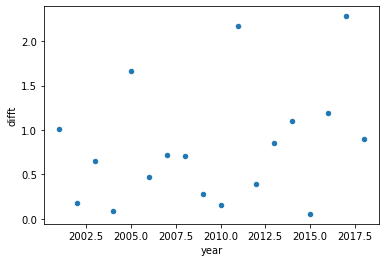

In [29]:
means_by_year.plot.scatter(x='year', y='difft')

## Save

In [30]:
if False:
    df_t_out.to_csv('../data/03_model_inputs/control_prothio_with_uncertainty.csv')

<AxesSubplot:xlabel='yearnoise', ylabel='control_with_noise_t'>

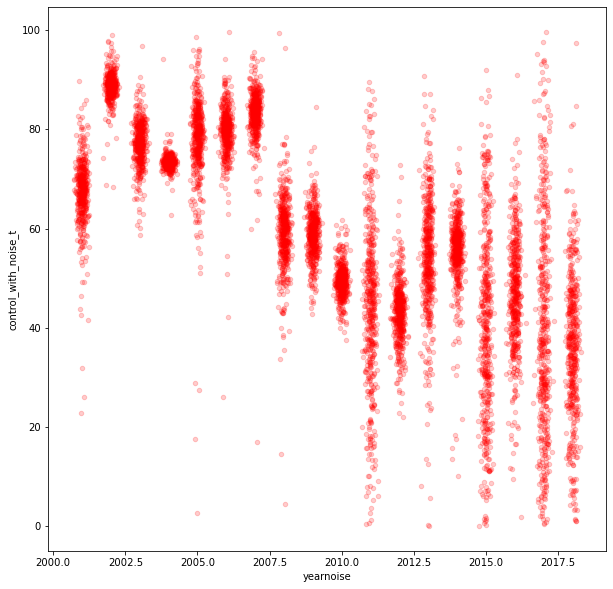

In [31]:
f, ax = plt.subplots(
    # nrows=2,
    # ncols=1,
    figsize=(10,10)
)

df_t_out.plot.scatter(x='yearnoise', y='control_with_noise_t', ax=ax, c='r', alpha=0.2)
# df_t_good.plot.scatter(x='yearnoise', y='control_with_noise_t', ax=ax, alpha=0.2)